Dataset : https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
df.head()

,tweet,emote
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [3]:
category = pd.get_dummies(df.emote)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='emote')
df_baru

,tweet,anger,fear,joy,love,sadness,surprise
0,i didnt feel humiliated,0,0,0,0,1,0
1,i can go from feeling so hopeless to so damned...,0,0,0,0,1,0
2,im grabbing a minute to post i feel greedy wrong,1,0,0,0,0,0
3,i am ever feeling nostalgic about the fireplac...,0,0,0,1,0,0
4,i am feeling grouchy,1,0,0,0,0,0
...,...,...,...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,0,0,0,1,0
15996,i am now turning and i feel pathetic that i am...,0,0,0,0,1,0
15997,i feel strong and good overall,0,0,1,0,0,0
15998,i feel like this was such a rude comment and i...,1,0,0,0,0,0


In [4]:
posts = df_baru['tweet'].values
label = df_baru[['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']].values

posts_latih, posts_test, label_latih, label_test = train_test_split(posts, label, test_size=0.2)

tokenizer = Tokenizer(num_words=3000, oov_token='x')
tokenizer.fit_on_texts(posts_latih)
tokenizer.fit_on_texts(posts_test)

sekuens_latih = tokenizer.texts_to_sequences(posts_latih)
sekuens_test = tokenizer.texts_to_sequences(posts_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

In [5]:
class SuccessCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') is not None and logs.get('val_accuracy') is not None:
            if logs.get('accuracy') > 0.92 and logs.get('val_accuracy') > 0.92:
                print("Training completed successfully! Accuracy and val_accuracy are both above 92%. Stopping training.")
                self.model.stop_training = True

model = Sequential([
    Embedding(input_dim=2000, output_dim=64),
    LSTM(128, dropout=0.2),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(padded_latih, label_latih, epochs=30,
                    validation_data=(padded_test, label_test), verbose=2,
                    callbacks=[SuccessCallback()])

Epoch 1/30
400/400 - 26s - loss: 1.4945 - accuracy: 0.3464 - val_loss: 1.3065 - val_accuracy: 0.3772 - 26s/epoch - 66ms/step
Epoch 2/30
400/400 - 6s - loss: 1.1279 - accuracy: 0.4616 - val_loss: 0.9581 - val_accuracy: 0.5666 - 6s/epoch - 15ms/step
Epoch 3/30
400/400 - 5s - loss: 0.8533 - accuracy: 0.6545 - val_loss: 0.6557 - val_accuracy: 0.7325 - 5s/epoch - 11ms/step
Epoch 4/30
400/400 - 3s - loss: 0.5962 - accuracy: 0.7563 - val_loss: 0.5814 - val_accuracy: 0.7713 - 3s/epoch - 8ms/step
Epoch 5/30
400/400 - 3s - loss: 0.4926 - accuracy: 0.8150 - val_loss: 0.4732 - val_accuracy: 0.8403 - 3s/epoch - 8ms/step
Epoch 6/30
400/400 - 3s - loss: 0.3688 - accuracy: 0.8737 - val_loss: 0.3527 - val_accuracy: 0.8791 - 3s/epoch - 8ms/step
Epoch 7/30
400/400 - 3s - loss: 0.2663 - accuracy: 0.9077 - val_loss: 0.2879 - val_accuracy: 0.9153 - 3s/epoch - 8ms/step
Epoch 8/30
400/400 - 4s - loss: 0.2224 - accuracy: 0.9216 - val_loss: 0.2658 - val_accuracy: 0.9175 - 4s/epoch - 10ms/step
Epoch 9/30
400/400

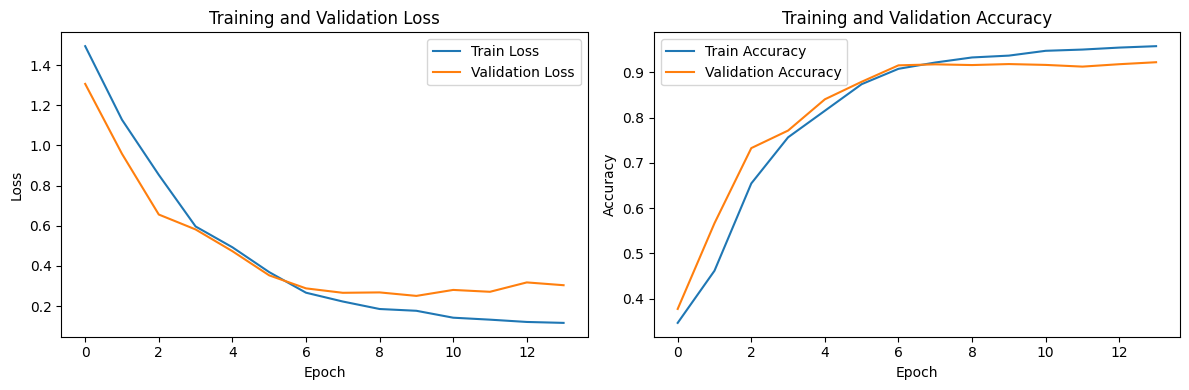

In [6]:
# Plot loss dan akurasi
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Akurasi
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()